# Module 1b: Analyzing your image - The Histogram
****

### Histogram<br>

[Open CV Histogram Guide](https://docs.opencv.org/4.x/de/db2/tutorial_py_table_of_contents_histograms.html)

We can see and analyze the information contained in images.  One of the main tools used in any image processing for this task is the **Histogram**.  A **Histogram** is a plot of the brightness (intensity) distribution of an image which in most cases has a range of 0 to 255 (8-bit).  The X-axis correspsonds to the brightness value and the Y-axis corresponds to the number of pixels at the given brightness in the image. 

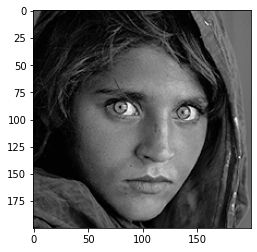

In [1]:
#Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Saving an image. 0 for grayscale. 1 for color. -1 for color with a alpha channel. 
img = cv2.imread('Graphics/face.png', 1)


#OpenCV by defualt uses BGR instead of RGB.  BGR is an old digital camera standard which has to be convert to RGB. Convert it to Gray.  How to in the next chapter. 
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Use matplotlib while using a python notebook
plt.imshow(img, cmap='gray')

So now we use cv.calcHist() function to find the histogram. Let's familiarize with the function and its parameters : <br><br>

cv.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])<br>
+ **images** : it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".<br>
+ **channels** : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.
+ **mask** : mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)
+ **histSize** : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].
+ **ranges** : this is our RANGE. Normally, it is [0,256].

In [16]:
print(img.shape)

# 2D array only containing on value for the brightness. 

(200, 200)


### Plot the 1-D histogram using Open CV

In [17]:
hist = cv2.calcHist([img],[0],None,[256],[0,256])
print(hist.shape)

(256, 1)


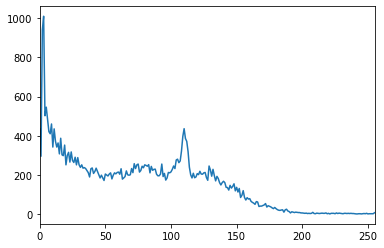

In [23]:
# Plot the hitogram
plt.plot(hist)
# Limit the range to 0, 255
plt.xlim([0,255])
# Show the plot
plt.show()

### Plot the histogram using MatPlotLib

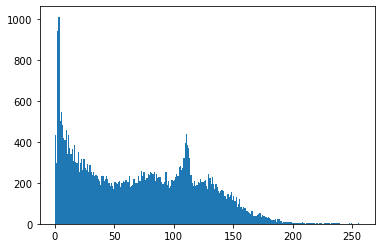

In [24]:
plt.hist(img.ravel(),256,[0,256]); plt.show()

In [36]:
# ravel() flattens a multi-dimensional array into a 1-D array.  same as reshape(-1). or use flatten() for larger arrays. 

# Create a 2-D array
arrayFlat = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
# This is the arrays shape
print(arrayFlat.shape)
# The orginial array
print(arrayFlat)
# Apply ravel
arrayFlat = np.ravel(arrayFlat)
# 1-D array
print(arrayFlat)

This is the arrays shape: (3, 4)
This is the array: [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[ 1  2  3  4  5  6  7  8  9 10 11 12]


### Let's plot the Histogram of a color image. 

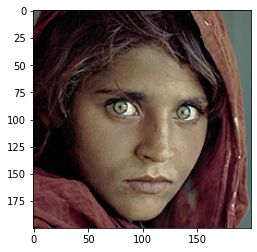

In [39]:
#Saving an image. 0 for grayscale. 1 for color. -1 for color with a alpha channel. 
img = cv2.imread('Graphics/face.png', 1)

#OpenCV by defualt uses BGR instead of RGB.  BGR is an old digital camera standard which has to be convert to RGB. 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

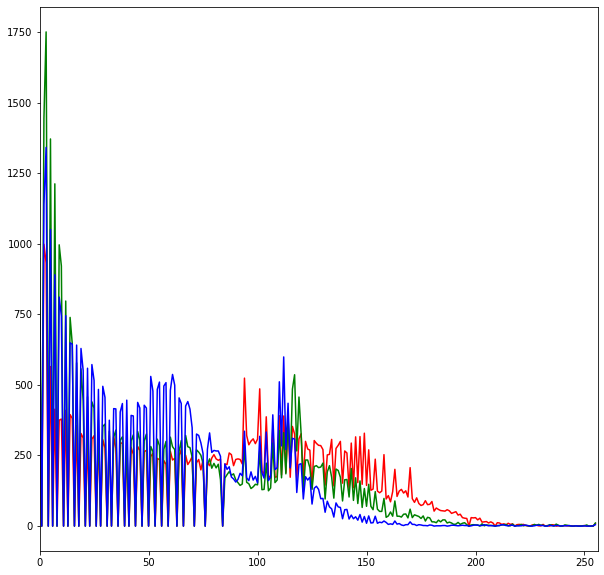

In [12]:
#Saving an image. 0 for grayscale. 1 for color. -1 for color with a alpha channel. 
img = cv2.imread('Graphics/face.png', 1)

#OpenCV by defualt uses BGR instead of RGB.  BGR is an old digital camera standard which has to be convert to RGB. 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Let's make the plot larger. 
fig = plt.figure(figsize=(10,10))

# First plot for the red channel.
hist = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(hist, color='red')
plt.xlim([0,256])

# Second plot for the green channel.
hist = cv2.calcHist([img],[1],None,[256],[0,256])
plt.plot(hist, color='green')
plt.xlim([0,256])

# Third plot the the blue channel. 
hist = cv2.calcHist([img],[2],None,[256],[0,256])
plt.plot(hist, color='blue')
plt.xlim([0,256])

plt.show()

### 2-D Histogram<br>

It is quite simple and calculated using the same function, cv.calcHist(). For color histograms, we need to convert the image from BGR to HSV. (Remember, for 1D histogram, we converted from BGR to Grayscale). For 2D histograms, its parameters will be modified as follows:<br>

+ channels = [0,1] because we need to process both H and S plane.
+ bins = [180,256] 180 for H plane and 256 for S plane.
+ range = [0,180,0,256] Hue value lies between 0 and 180 & Saturation lies between 0 and 256.

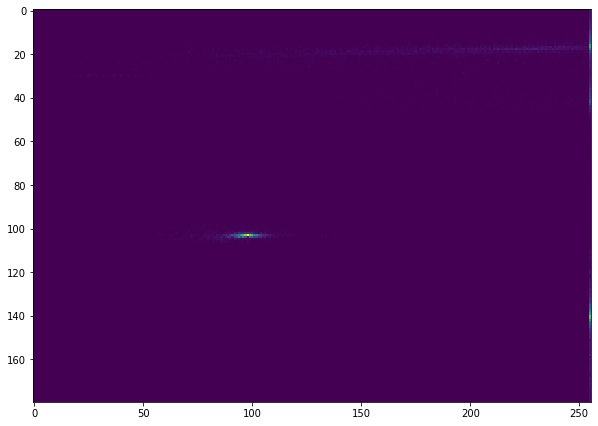

In [23]:
#Saving an image. 0 for grayscale. 1 for color. -1 for color with a alpha channel. 
img = cv2.imread('Graphics/tiger.png', 1)

fig = plt.figure(figsize=(10,10))
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
hist = cv2.calcHist( [hsv], [0, 1], None, [180, 256], [0, 180, 0, 256] )
plt.imshow(hist,interpolation = 'nearest')
plt.show()


### Equalization

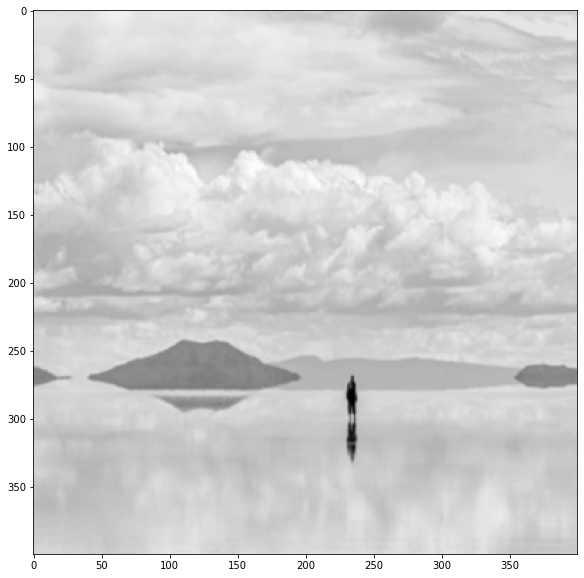

In [43]:
#Saving an image. 0 for grayscale. 1 for color. -1 for color with a alpha channel. 
imgContrast = cv2.imread('Graphics/lowcontrast.png', 0)

#OpenCV by defualt uses BGR instead of RGB.  BGR is an old digital camera standard which has to be convert to RGB. 
imgContrast = cv2.cvtColor(imgContrast, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize = (10,10))
plt.imshow(imgContrast, cmap='gray')

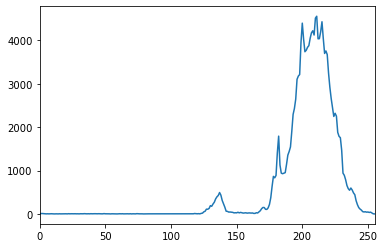

In [46]:
hist = cv2.calcHist([imgContrast],[0],None,[256],[0,256])
# Plot the hitogram
plt.plot(hist)
# Limit the range to 0, 255
plt.xlim([0,255])
# Show the plot
plt.show()

### [Histogram Equalization Formula](https://en.wikipedia.org/wiki/Histogram_equalization)

(256,)


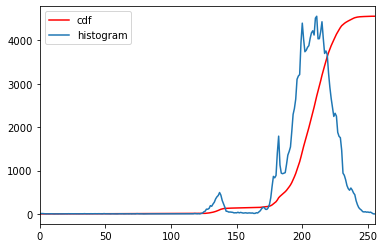

In [50]:
# get the cumulative sum of the images histogram. [[2,4,6], [1,3,5]] -> [2,6,12,13,16,21]
cdf = hist.cumsum()

# normalize the cumulative sum.  Cumulative sum multipled by the value with the maximum frequency divided 
cdf_normalized = cdf * float(hist.max()) / cdf.max()


plt.plot(cdf_normalized, color = 'r')
plt.plot(hist)
# Limit the range to 0, 255
plt.xlim([0,255])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [51]:
# Find the minimum pixel value excluding 0.  This is what np.ma.masked_equal accomplishes. 

cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [52]:
imgContrast = cdf[imgContrast]

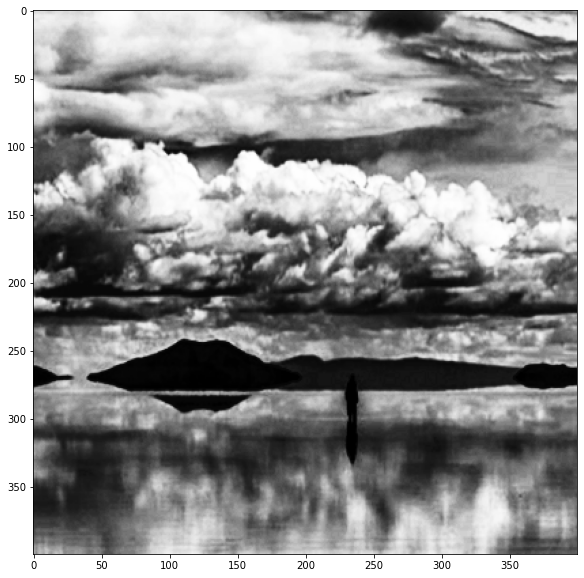

In [54]:
fig = plt.figure(figsize = (10,10))
plt.imshow(imgContrast)

### Histogram Back Projection

[Histogram Back Projection](https://docs.opencv.org/4.x/dc/df6/tutorial_py_histogram_backprojection.html)